In [1]:
# import python libraries and packages
from textblob import TextBlob
import json
import matplotlib.pyplot as plt
%matplotlib inline  
from  matplotlib import style
import pandas as pd
import numpy as np
from itertools import *
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

#import all necessary packages for nltk, regex, and stopwords 
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('breweries.csv', encoding="latin1")

In [3]:
df.head()

,id,address,categories,city,country,hours,keys,latitude,longitude,menus,name,postalCode,province,twitter,websites
0,AVweN1T_ByjofQCxwSPL,Syr Airport,Brewery,Syracuse,US,NaN,us/ny/syracuse/syrairport/2098450797,NaN,NaN,NaN,Adirondack Pub,NaN,NY,NaN,NaN
1,AVwdkF9ZIN2L1WUfxDfw,1320 N Doctor Martin Luther King Dr,Office and Cafeteria Brewer's Hill,Milwaukee,US,NaN,us/wi/milwaukee/1320ndoctormartinlutherkingdr/...,NaN,NaN,NaN,The Waterfront Cafe,53212,WI,NaN,NaN
2,AVwdlPkf_7pvs4fz7TMr,608 4th St,Brewery Downtown Clovis,Clovis,US,"[{""day"":""Wed - Sat"",""hour"":""5:00 PM - 8:00 PM""}]",us/ca/clovis/6084thst/-932885010,NaN,NaN,NaN,559 Local Brewing,93612,CA,NaN,http://fresnobrewing.com
3,AVwcucY0kufWRAb5yWbU,1103 Mills St,breweries & brew pubs,Black Earth,US,NaN,us/wi/blackearth/1103millsst/-757413411,43.138995,-89.747904,NaN,Shack The,53515-9454,WI,NaN,NaN
4,AVweCkd5kufWRAb5_eaI,130 W Riverside Dr,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,US,"[{""day"":""Wed - Thu"",""hour"":""3:00 PM - 9:00 PM""...",us/utica/jeffersonville/130wriversidedr/787280564,NaN,NaN,NaN,Flat12 Bierworks,47130,Utica,flat12bierwerks,http://flat12.me/brewery


In [5]:
den = df[df.city=='Denver']
den = pd.DataFrame(den)
por = df[df.city=='Portland']
por = pd.DataFrame(por)
sd = df[df.city=='San Diego']
sd = pd.DataFrame(sd)
sea = df[df.city=='Seattle']
sea = pd.DataFrame(sea)
chi = df[df.city=='Chicago']
chi = pd.DataFrame(chi)
aus = df[df.city=='Austin']
aus = pd.DataFrame(aus)

In [14]:
frames = den,por,sd,sea,chi,aus
topsix = pd.concat(frames)

In [15]:
topsix.shape

(1318, 15)

In [45]:
print(topsix.province.value_counts()[0:20])
print(topsix.city.value_counts()[0:20])
print(topsix.twitter.value_counts()[0:20])
print(topsix.websites.value_counts()[0:20])
print(topsix.postalCode.value_counts()[0:20])
print(topsix.name.value_counts()[0:20])
print(topsix.categories.value_counts()[0:20])
print(topsix.address.value_counts()[0:20])
print(topsix.hours.value_counts()[0:20])

CA                261
WA                215
CO                203
OR                183
IL                168
TX                126
ME                 42
California         33
Wallingford        12
Washington         12
Colorado            9
Illinois            9
Ontario Street      5
Texas               5
Northgate           5
Circleville         4
Duwamish            3
Pioneer Square      2
Wheat Ridge         2
Marshall Ford       2
Name: province, dtype: int64
San Diego    294
Seattle      251
Portland     228
Denver       216
Chicago      188
Austin       141
Name: city, dtype: int64
captainneon        8
laurelwood1        4
bjsrestaurants     4
bpbrewing          4
revbrewchicago     3
hmshost            3
stoupbrewing       2
acousticales       2
greenflashbeer     2
moderntimesbeer    2
roughdraftbrew     2
cascadebrewing     2
hellbentb          2
basecampbrewing    2
elliottbay_beer    2
rogueales          2
holymtnbrewing     2
borderxbrewing     2
greatdividebrew    2
mhb  

In [26]:
topsix.count()

id            1318
address       1318
categories    1318
city          1318
country       1318
hours          661
keys          1318
latitude       937
longitude      937
menus          147
name          1318
postalCode    1180
province      1318
twitter        335
websites       588
dtype: int64

In [55]:
topsix_twitter = topsix.twitter.dropna()

In [56]:
topsix_twitter = topsix_twitter.drop_duplicates()

In [58]:
topsix_twitter.count()

279

In [68]:
city_values = topsix.city.value_counts()
print(city_values)

San Diego    294
Seattle      251
Portland     228
Denver       216
Chicago      188
Austin       141
Name: city, dtype: int64


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


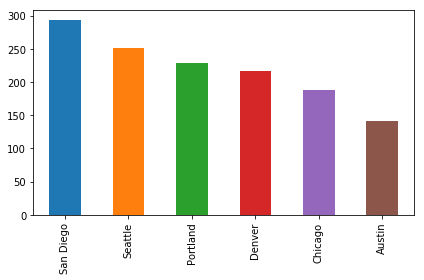

In [73]:
city_values.plot.bar()

In [91]:
catg_values = topsix.categories.value_counts()[0:15]
print(catg_values)

Brewery                                            165
Brewers                                            135
Attraction,Bars,Clubs and Nightlife,Brewery         67
Restaurant,Brewery                                  31
Restaurant,Pubs,Brewery                             25
brewery                                             21
Attraction,Bars,Clubs and Nightlife,Brewery,Pub     15
Brewers,Wineries                                    14
Breweries                                           13
Brewery,Restaurant                                  13
Breweries,Food & Drink                              11
Restaurant,American,Pubs,Brewery                    10
Restaurant,American,Pizza,Pubs,Brewery               9
Restaurant,American,Brewery                          9
Attraction,Brewery                                   8
Name: categories, dtype: int64


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


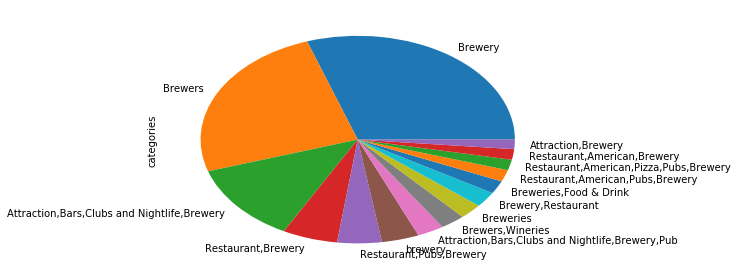

In [92]:
catg_values.plot.pie()

In [101]:
topsix['no_twitter']= topsix.twitter.isna()

In [102]:
topsix.head()

,id,address,categories,city,country,hours,keys,latitude,longitude,menus,name,postalCode,province,twitter,websites,twitter?,has_twit,no_twitter
568,AVwej-w3IN2L1WUf6HK8,1290 S Broadway,Brewery,Denver,US,"[{""day"":""Monday"",""hour"":""None""},{""day"":""Wednes...",us/co/denver/1290sbroadway/-2076057775,NaN,NaN,NaN,Former Future Brewing Company,80210,CO,formerfutureco,http://embracegoodtaste.com,False,False,False
640,AVwdQuH3ByjofQCxnPfO,1660 Champa St,Breweries & Wineries,Denver,US,NaN,us/co/denver/1660champast/-1502535091,39.747169,-104.993057,NaN,D'vine Wine Denver,80202,CO,NaN,http://www.dvinewineusa.com,True,True,True
700,AVwc2E2VIN2L1WUfphDU,1555 Blake St,"Music Venue,Bar and Music Venue,Bar,Pubs,Bars ...",Denver,US,"[{""day"":""Mon - Sun"",""hour"":""11:00 AM - 2:00 AM...",us/co/denver/1555blakest/1757676697,39.750288,-104.999768,NaN,World of Beer,80202,CO,mapquest,"http://worldofbeer.com/Locations/Lodo,http://m...",False,False,False
770,AVwdhk0DIN2L1WUfwqtr,7260 W Alaska Dr,"Music Venue,Bars & Pubs,Pubs,Breweries,Bar",Denver,US,"[{""day"":""Mon - Fri"",""hour"":""2:00 PM - 2:00 AM""...",us/co/denver/7260walaskadr/1757676697,39.709068,-105.077258,NaN,World of Beer,80226,CO,NaN,http://worldofbeer.com/Locations/Belmar,True,True,True
1002,AVwcizXVkufWRAb5wVk8,1257 W 120th Ave,"American Restaurant,Brewery,Fast Food Restaura...",Denver,US,"[{""day"":""Sun"",""hour"":""10:00 AM - Midnight""},{""...",us/westminster/denver/1257w120thave/581064341,39.914928,-105.000843,NaN,C.b. & Potts,80234,Westminster,NaN,http://cbpotts.com,True,True,True


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


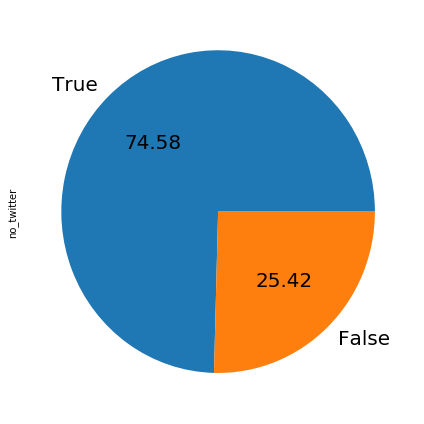

In [116]:
topsix_twitter_value_counts = topsix.no_twitter.value_counts()
topsix_twitter_value_counts.plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6))

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


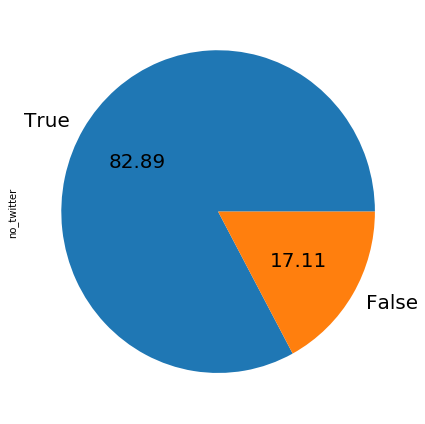

In [117]:
df2 = df
df2['no_twitter']= df2.twitter.isna()
df_twitter_value_counts = df2.no_twitter.value_counts()
df_twitter_value_counts.plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6))

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


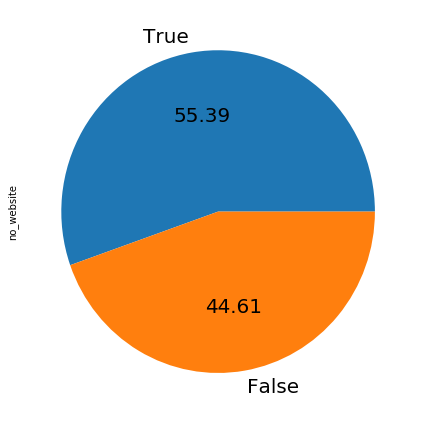

In [115]:
topsix['no_website'] = topsix.websites.isna()
topsix_website_counts = topsix.no_website.value_counts()
topsix_website_counts.plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6))

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


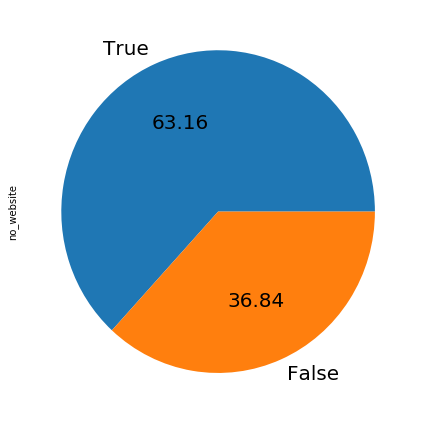

In [118]:
df2['no_website'] = df2.websites.isna()
df_website_counts = df2.no_website.value_counts()
df_website_counts.plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6))

In [169]:
topsix.categories.str.contains('Attraction').value_counts()

False    1190
True      128
Name: categories, dtype: int64